# **Result Analytics**
### Analisa feature yang errornya > MAE


MAE adalah mean absolute error yang digunakan untuk menghitung rata-rata error prediksi harga. Jika error < MAE artinya model telah cukup baik untuk memprediksi harga pada produk tersebut. Sebaliknya, jika error > MAE, Artinya model tidak cukup baik melakukan prediksi harga. Dalam hal ini, perusahaan harus hati-hati untuk menentukan harga pada product-product yang errornya > MAE. Karena jika error prediksi harga besar (over price/under price), maka perusahaan akan mengalami kerugian.
<br><br>
Untuk mengetahui kriteria-kriteria product mana saja yang harus diberi perhatian lebih oleh perusahaan maka dilakukan analisa tiap feature yang nilai errornya > MAE.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import statsmodels.api as sm
import pylab as pl

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import SCORERS, r2_score, mean_absolute_error, mean_squared_error, make_scorer

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('result_model_ikea.csv', index_col = 0).reset_index()
df = df.drop(columns = df.columns[0])

In [6]:
df

,category,discount_flag,sellable_online,other_colors,designer,depth,height,width,y_test,y_pred,error
0,Bookcases & shelving units,0,True,False,No Designer,51.0,104.0,50.0,200.0,354.835800,154.835800
1,Chairs,0,True,False,Mia Lagerman,52.0,82.0,52.0,195.0,274.796729,79.796729
2,Tables & desks,0,True,False,No Designer,3.0,70.0,4.0,25.0,137.937652,112.937652
3,Sofas & armchairs,0,True,True,No Designer,55.0,83.0,80.0,350.0,283.610234,66.389766
4,Wardrobes,1,True,False,Ehlén Johansson,50.0,350.0,91.0,750.0,1352.321202,602.321202
...,...,...,...,...,...,...,...,...,...,...,...
862,Bookcases & shelving units,1,True,True,Francis Cayouette,60.0,14.0,38.0,18.0,64.804670,46.804670
863,TV & media furniture,0,True,True,No Designer,40.0,202.0,60.0,420.0,751.541643,331.541643
864,Wardrobes,1,True,False,Ehlén Johansson,55.0,216.0,164.0,1245.0,1424.247536,179.247536
865,Sofas & armchairs,0,True,True,Ola Wihlborg,99.0,83.0,192.0,4190.0,2315.279375,1874.720625


### Error Percentage

In [24]:
mae = mean_absolute_error(df.y_test,df.y_pred)
underMAE = df[df.error <= mae]['category'].count()
moreMAE = df[df.error > mae]['category'].count()

slicingMAE = pd.DataFrame({'category': ['under MAE','higher MAE'],
                             'total': [underMAE,moreMAE]})

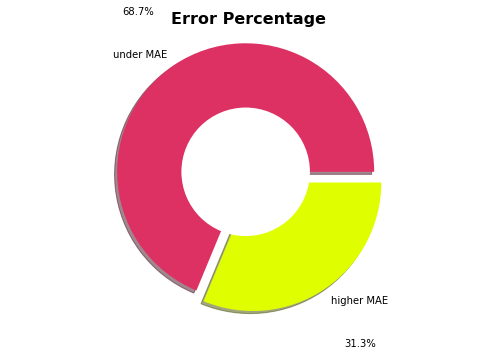

In [26]:
colors = ['#DE3163', '#DFFF00']
# only "explode" 
explode = (0, 0.1)  

plt.figure(figsize=[7, 5])
plt.pie(slicingMAE.total, explode=explode, labels=['under MAE','higher MAE'], autopct='%1.1f%%', colors=colors, pctdistance=1.5, shadow=True)
plt.title('Error Percentage', fontsize = 16, fontweight='bold')

#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

Pertama, harus dilakukan pemetaan percentage terlebih dahulu terhadap data mana yang masuk dalam kategori < MAE dan data mana yang masuk kategori > MAE.
Terdapat 68.7% data yang prediksi harganya < MAE. Artinya model dapat memperkirakan harga product dengan baik pada data-data ini. Sedangkan sisanya, sebesar 31.3%, perlu dianalisa lebih lanjut di tiap featurenya.

### Jumlah kategori yang error prediksi harganya > MAE (prediksi errornya besar)

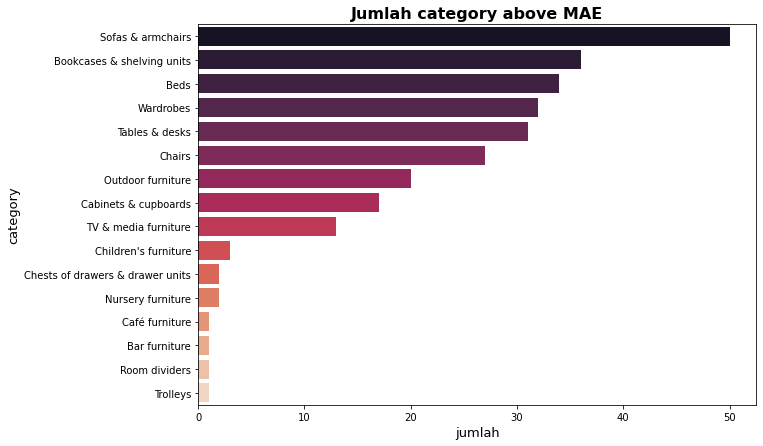

In [87]:
plt.figure(figsize=[10, 7])
result = df[df['error'] > mae]['category'].value_counts().reset_index()
sns.barplot(data=result, y='index', x='category', palette='rocket')
plt.title('Jumlah category above MAE', fontsize = 16, fontweight='bold')
plt.xlabel('jumlah', fontsize = 13)
plt.ylabel('category', fontsize = 13)
plt.show()

Dari grafik di atas dapat dilihat bahwa category product Sofa & armchairs menyumbangkan jumlah terbesar dalam meningkatnya prediksi harga error. Diikuti oleh category Bookcases & shelving units kemudian Beds dan Wardobes. Perusahaan harus berhati-hati dalam menentukan harga yang productnya termasuk pada category tersebut (Terutama Sofa & armchairs).

### Designer yang error prediksi harganya > MAE

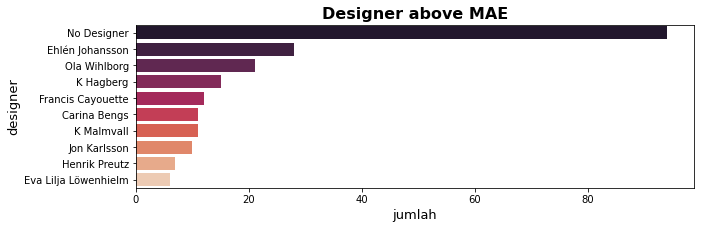

In [68]:
plt.figure(figsize=[10, 3])
result = df[df['error'] > mae]['designer'].value_counts().reset_index().sort_values('designer', ascending=False)[:10]
sns.barplot(data=result, y='index', x='designer', palette='rocket')
plt.title('Designer above MAE', fontsize = 16, fontweight='bold')
plt.xlabel('jumlah', fontsize = 13)
plt.ylabel('designer', fontsize = 13)
plt.show()

Sedangkan pada feature designer, product yang tidak diketahui nama designernya sangat berpengaruh terhadap besarnya prediksi error harga. Product dengan designer Ehlen Johansson dan Ola Wihlborg merupakan urutan ke 2 dan 3 yang menyumbangkan tingginya prediksi error harga.

### Analisa Depth, Height, width Product

#### Kedalaman product yang error prediksi harganya > MAE

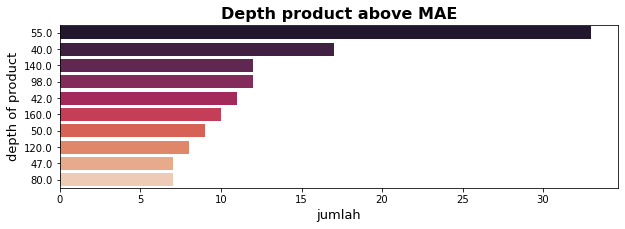

In [74]:
plt.figure(figsize=[10, 3])
result = df[df['error'] > mae]['depth'].value_counts().reset_index().sort_values('depth', ascending=False)[:10]
result['index'] = result['index'].astype(str) 
sns.barplot(data=result, y='index', x='depth', palette='rocket')
plt.title('Depth product above MAE', fontsize = 16, fontweight='bold')
plt.xlabel('jumlah', fontsize = 13)
plt.ylabel('depth of product', fontsize = 13)
plt.show()

#### Tinggi product yang error prediksi harganya > MAE

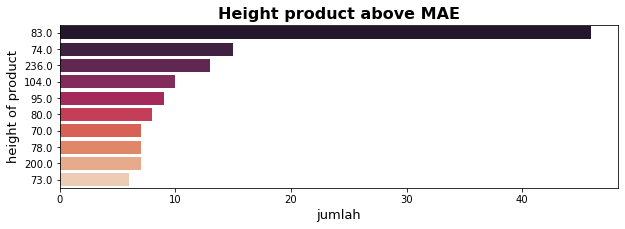

In [76]:
plt.figure(figsize=[10, 3])
result = df[df['error'] > mae]['height'].value_counts().reset_index().sort_values('height', ascending=False)[:10]
result['index'] = result['index'].astype(str) 
sns.barplot(data=result, y='index', x='height', palette='rocket')
plt.title('Height product above MAE', fontsize = 16, fontweight='bold')
plt.xlabel('jumlah', fontsize = 13)
plt.ylabel('height of product', fontsize = 13)
plt.show()

#### Lebar product yang error prediksi harganya > MAE

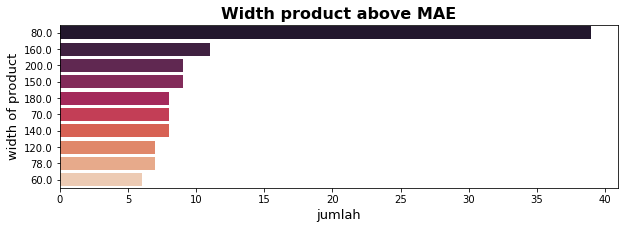

In [77]:
plt.figure(figsize=[10, 3])
result = df[df['error'] > mae]['width'].value_counts().reset_index().sort_values('width', ascending=False)[:10]
result['index'] = result['index'].astype(str) 
sns.barplot(data=result, y='index', x='width', palette='rocket')
plt.title('Width product above MAE', fontsize = 16, fontweight='bold')
plt.xlabel('jumlah', fontsize = 13)
plt.ylabel('width of product', fontsize = 13)
plt.show()

Dari data diatas dapat dilihat bahwa product dengan ukuran tertentu memberikan pengaruh terhadap tingginya prediksi error harga. Maka perusahaan sebaiknya memberikan perhatian lebih pada product dengan ukuran  kedalaman 40 - 55 cm, tinggi 74 - 83 cm, dan lebar 80 cm untuk memperkecil error prediksi harga.

### Jenis penjualan (sellable_online/tdk) yang error prediksi harganya > MAE

In [82]:
result = df[df['error'] > mae]['sellable_online'].value_counts().reset_index()
result

,index,sellable_online
0,True,271


Product yang prediksi errornya besar adalah product yang dapat dijual secara online. Hal ini disebabkan karena memang sebagian besar product IKEA memang dapat dijual secara online. Sehingga perusahaan tidak perlu memikirkan kriteria ini.

### Pilihan warna yang error prediksi harganya > MAE

In [83]:
result = df[df['error'] > mae]['other_colors'].value_counts().reset_index()
result

,index,other_colors
0,True,147
1,False,124


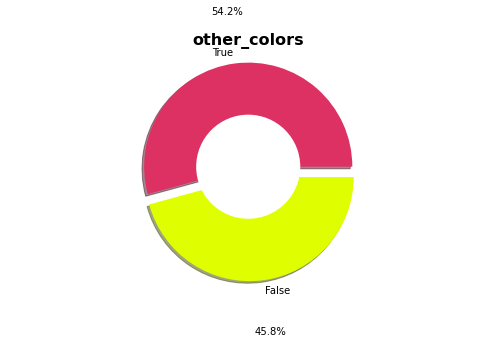

In [85]:
colors = ['#DE3163', '#DFFF00']
# only "explode" 
explode = (0, 0.1)  

plt.figure(figsize=[7, 5])
plt.pie(result.other_colors, explode=explode, labels=['True','False'], autopct='%1.1f%%', colors=colors, pctdistance=1.5, shadow=True)
plt.title('other_colors', fontsize = 16, fontweight='bold')

#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

Dari pemetaan diatas dapat dilihat bahwa prosentase product dengan pilihan warna dan product yang tidak ada pilihan warna mempunyai pengaruh hampir sama terhadap besarnya prediksi error harga. Sehingga perusahaan juga dapat mengabaikan feature ini.

## Conclusion

Perusahaan harus lebih berhati-hati dalam menentukan harga terhadap product yang mempunyai karakteristik berikut:
1. Product yang termasuk dalam category Sofa & armchairs, Bookcases & shelving units, Beds dan Wardobes
1. Product yang tidak diketahui designernya
1. Product dengan ukuran kedalaman 40 - 55 cm
1. Product dengantinggi 74 - 83 cm, dan 
1. Product dengan lebar 80 cm

Product dengan karakteristik diatas berpengaruh terhadap besarnya error dalam prediksi harga. Karena jika error prediksi harga besar (over price/under price), maka perusahaan akan mengalami kerugian.